In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

In [4]:
#Goal of project
#1. Take in an audio file
#2. Analyze features of the audio file
#3. Determine which hip-hop artist is most associated/fit for that beat

#General Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import wave
import spotipy
import re
from spotipy.oauth2 import SpotifyClientCredentials


#ML Libraries

import matplotlib.pyplot as plt
import sklearn


# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt


# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from tensorflow.keras import initializers

artistsID = r"C:\Users\Pruthvi\Desktop\Beat Classifier\artistsid.csv"



In [5]:
#SETTING UP

#Spotify Auth
cid = "your client id"
secret = "your secret id"

#Creating Spotify Instance
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

df = pd.read_csv(artistsID)
df.head(5)

,Artist,Artist ID
0,NAV,7rkW85dBwwrJtlHRDkJDAC
1,Drake,3TVXtAsR1Inumwj472S9r4
2,Tory Lanez,2jku7tDXc6XoB6MO2hFuqg
3,J. Cole,6l3HvQ5sa6mXTsMTB19rO5
4,Future,1RyvyyTE3xzB2ZywiAwp0i


In [363]:
#REGEX

#re.sub(r'[a-z]+:[a-z]+:', '',sp.artist_top_tracks(artistdf.iloc[0,1], country='US')['tracks'][9]['uri'])

## Processing Song Data From My 50 Most Influential Artists

In [254]:
#Creating Dictionary with
#KEYS: artist names 
#VALUES: dictionary of artist's albums.

AllAlbums ={}
for row in range(len(df)):
    artistName = df.iloc[row,0]
    artistID = df.iloc[row,1]
    artistAlbums = {}
    
    for album in range(len(sp.artist_albums(artistID)['items'])):
        albumName = sp.artist_albums(artistID)['items'][album]['name']
        albumID = sp.artist_albums(artistID)['items'][album]['uri']
        artistAlbums[albumName] = albumID
    AllAlbums[artistName] = artistAlbums


In [258]:
#Create main dataframe with all song names/ids and album names/ids from my top 50 artists.
#Cell might take a while to run!!!
df2 = pd.DataFrame(columns=['Artist', 'Album', 'Album ID', 'Song', 'Song ID'])
for artist in AllAlbums.keys():
    artistDisc = AllAlbums[artist]
    for album in artistDisc.keys():
        albumID = artistDisc[album]
        albumlength = len(sp.album_tracks(artistDisc[album])['items'])
        for song in range(albumlength):
            songname = sp.album_tracks(albumID)['items'][song]['name']
            songid = sp.album_tracks(albumID)['items'][song]['uri']
            
            df2.loc[len(df2.index)] = [artist, album, albumID, songname, songid]

#Drop duplicate songs since deluxe and original versions of an album overlap in songs.            
df2 = df2.drop_duplicates(subset=['Song ID'])

#merge with inital df to get artist IDs.
maindf = df.merge(df2, left_on='Artist', right_on='Artist', how='inner')

In [518]:
maindf.to_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\artistsongs.csv')
maindf

,Artist,Artist ID,Album,Album ID,Song,Song ID
0,NAV,7rkW85dBwwrJtlHRDkJDAC,Emergency Tsunami (Bonus Version),spotify:album:3aMMFb7DaFT06VfavwhrPi,Breaking News Intro,spotify:track:0Kj67wCgRtCeh2vnnDVRw6
1,NAV,7rkW85dBwwrJtlHRDkJDAC,Emergency Tsunami (Bonus Version),spotify:album:3aMMFb7DaFT06VfavwhrPi,Friends & Family,spotify:track:4NacsqyQU8nZDIdxShKlpU
2,NAV,7rkW85dBwwrJtlHRDkJDAC,Emergency Tsunami (Bonus Version),spotify:album:3aMMFb7DaFT06VfavwhrPi,Young Wheezy (with Gunna),spotify:track:0DZCRBEqV2GYTWj8OPA49H
3,NAV,7rkW85dBwwrJtlHRDkJDAC,Emergency Tsunami (Bonus Version),spotify:album:3aMMFb7DaFT06VfavwhrPi,Nasty,spotify:track:0oAaQfGlKYKHciaZ3OixSh
4,NAV,7rkW85dBwwrJtlHRDkJDAC,Emergency Tsunami (Bonus Version),spotify:album:3aMMFb7DaFT06VfavwhrPi,Repercussions (with Young Thug),spotify:track:6fEJ1nO1u301h8wbBeB4qu
...,...,...,...,...,...,...
7216,2 Chainz,17lzZA2AlOHwCwFALHttmp,Different World,spotify:album:6WtNWoJQqSWkha9uv8Qst5,Own Drugs,spotify:track:3cFzqY0gYPizoH7Yrpc7G6
7217,2 Chainz,17lzZA2AlOHwCwFALHttmp,Different World,spotify:album:6WtNWoJQqSWkha9uv8Qst5,R.I.P. (feat. Young Jeezy),spotify:track:48don0YE42Hb4GqBuw0t2Q
7218,2 Chainz,17lzZA2AlOHwCwFALHttmp,Different World,spotify:album:6WtNWoJQqSWkha9uv8Qst5,Rick As F*ck,spotify:track:05IdIzkrC9KsSsSRY3jpPr
7219,2 Chainz,17lzZA2AlOHwCwFALHttmp,Different World,spotify:album:6WtNWoJQqSWkha9uv8Qst5,So Gone,spotify:track:7vHQ8QpA0FxPTLa29pupTu


### Creating Dataframe with all songs and their features
Danceability, energy, key, loudness, mode, acousticness, liveness, valence, tempo, and duration

In [312]:
#Song Features dataframe
#Columns: Artist, Danceability, Energy, Key, 
#Loudness, mode, acousticness, liveness, valence, tempo, duration_ms
#https://medium.com/@FinchMF/praise-questions-and-critique-spotify-api-38e984a4174b    -  explains audio features
featuresdf = pd.DataFrame(columns=['artist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
                                  'liveness', 'valence', 'tempo', 'duration_ms'])
for row in range(len(maindf)):
    artist = maindf.iloc[row,0]
    songID = maindf.iloc[row,5]
    features = sp.audio_features(songID)[0]

    
    featuresdf.loc[len(featuresdf)] = [artist, features['danceability'], features['energy'], 
                                             features['key'], features['loudness'], features['mode'],
                                            features['acousticness'], features['liveness'], features['valence'],
                                       features['tempo'], features['duration_ms']]




Mode describes if a song has a major or minor scale. I will simply turn this feature into two new features, major and minor. This is like one-hot-encoding the categorical mode feature.

In [516]:
featuresdf['major'] = featuresdf['mode']
featuresdf['minor'] = abs(1- featuresdf['mode'])
featuresdf = featuresdf.drop('mode', axis=1)

I am removing artists with less than 100 songs. 

In [1523]:
#featuresdf = pd.read_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\songfeatures.csv')

In [1524]:
artistsfrequency = featuresdf.groupby('artist').agg('count').loc[:,'danceability']
artistsfrequency = pd.DataFrame(data = {'artist':artistsfrequency.index,
                                        'frequency':artistsfrequency.loc[:].to_numpy().astype(int)},
                                index = range(50))

In [1517]:
artistsfrequency.head(5)

,artist,frequency
0,2 Chainz,183
1,21 Savage,190
2,88GLAM,98
3,Belly,75
4,Big Sean,160


In [1528]:
featuresdf = featuresdf.merge(artistsfrequency, how='inner', on='artist')
featuresdf = featuresdf.loc[featuresdf['frequency'] >=100,:]

In [1529]:
featuresdf.index = range(len(featuresdf))

In [1530]:
featuresdf = featuresdf.drop(['frequency'],axis=1)

In [1531]:
featuresdf

,artist,danceability,energy,key,loudness,acousticness,liveness,valence,tempo,duration_ms,major,minor
0,NAV,0.721,0.684,5,-10.378,0.93700,0.9010,0.913,126.958,34936,1,0
1,NAV,0.835,0.509,1,-6.792,0.03420,0.1400,0.275,129.077,145121,1,0
2,NAV,0.918,0.544,6,-3.749,0.01220,0.0850,0.311,122.017,151481,0,1
3,NAV,0.955,0.619,5,-5.242,0.03170,0.1080,0.524,116.026,157242,0,1
4,NAV,0.788,0.778,11,-4.931,0.00218,0.1440,0.543,159.995,159004,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6054,2 Chainz,0.732,0.729,9,-2.955,0.14900,0.5080,0.690,128.968,253200,0,1
6055,2 Chainz,0.823,0.612,11,-5.832,0.08420,0.1100,0.537,96.989,199160,1,0
6056,2 Chainz,0.776,0.427,1,-11.808,0.02460,0.0882,0.891,132.192,230280,1,0
6057,2 Chainz,0.727,0.632,9,-11.110,0.03410,0.0829,0.635,148.553,219227,0,1


In [1535]:
#featuresdf.to_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\songfeaturesartistfiltered.csv')

In [17]:
featuresdf = pd.read_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\songfeaturesartistfiltered.csv')

### Creating Song and Feature Dataframe For My Beats

In [1303]:
myBeats = {}
beatTapeID = "6jojGLvkUS27x2T0Nmg8yw"
for song in range(10):
    beatName = sp.album_tracks(beatTapeID)['items'][song]['name']
    beatID = sp.album_tracks(beatTapeID)['items'][song]['uri']
    myBeats[beatName] = beatID

myfeaturesdf = pd.DataFrame(columns=['Beat Name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
                                  'liveness', 'valence', 'tempo', 'duration_ms'])

for eachSong in myBeats.keys():
    features = sp.audio_features(myBeats[eachSong])[0]
    myfeaturesdf.loc[len(myfeaturesdf)] = [eachSong, features['danceability'], features['energy'], 
                                             features['key'], features['loudness'], features['mode'],
                                            features['acousticness'], features['liveness'], features['valence'],
                                       features['tempo'], features['duration_ms']]
    
myfeaturesdf['major'] = myfeaturesdf['mode']
myfeaturesdf['minor'] = abs(1- myfeaturesdf['mode'])
myfeaturesdf = myfeaturesdf.drop('mode', axis=1)

\* When exporting dataframe to csv, there will be an extra index column created in the most left row of the spreadsheet. You can easily manually remove it.

In [1308]:
#myfeaturesdf.to_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\mybeatfeatures.csv')

In [1309]:
myfeaturesdf = pd.read_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\mybeatfeatures.csv')

# Creating Keras Classification Model

Important Note: This model will be evaluated qualitatively at the end. It will be trained on the gathered songs, with the X matrix being the song's relevant features and the Y matrix being the artist. In the end, the model should be able to handle a series of audio features and output which artist is most closely associated with the features. 

### Binary Classification
I will start with a simpler version of this project: Binary Classification. Specifically, I will classify my beats between two of my top, randomly-selected artists: NAV and Drake. Afterwards, I'll scale up the architecture of the ANN and try it with more artists, till I can reach them all.

In [ ]:
featuresdf = pd.read_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\songfeaturesartistfiltered.csv')

In [1560]:
featuresdf.head(324)
preBinaryX = featuresdf.iloc[:324,1:]
preBinaryY = featuresdf.iloc[:324,0]

In [1561]:
X = preBinaryX.to_numpy()
Y = [0 if y == 'NAV' else 1 for y in preBinaryY.to_numpy()]
Y = to_categorical(Y)

In [1562]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [1563]:
#We are transforming x_test by X_train's mean and sd so that the test set is in the same terms/"basis" as 
#the training set.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [1419]:
#def test_model(layers, activation):
#    model = Sequential()
#    for layer, nodes in enumerate(layers):
#        if layer == 0:
#            model.add(Dense(nodes, input_dim=11, activation=activation))
#        else:
#            model.add(Dense(nodes, activation=activation))
#    model.add(Dense(2, activation='softmax'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model

In [1430]:
#model_binary = KerasClassifier(build_fn=test_model, verbose=0)
#model_binary

In [1431]:
#layers = ([16], [32], [64], [16, 16], [32, 32], [64, 64], [16, 32], [32, 64], [16, 64])
#activations = ('sigmoid', 'relu')
#all_epochs = (1000, 2000)
#param_grid = dict(layers = layers, activation=activations, batch_size = (128, 256), epochs=all_epochs)
#grid = GridSearchCV(estimator=model_binary, param_grid=param_grid)

In [1432]:
#best_model = grid.fit(X_train, y_train)

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002AFC9E4B670>, as the constructor either does not set or modifies parameter layers

In [1396]:
model_binary = Sequential()
model_binary.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dropout(0.4))
model_binary.add(Dense(32, activation='relu'))
model_binary.add(Dense(2, activation='softmax'))

filepath=r"C:\Users\Pruthvi\Desktop\Beat Classifier"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

sgd = SGD(lr=0.001)

In [1397]:
model_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1398]:
history = model_binary.fit(X_train, y_train, epochs=1000, batch_size=200, callbacks=callbacks_list, validation_split=0.15)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 0.7376 - accuracy: 0.5000
Epoch 00001: val_accuracy improved from -inf to 0.47059, saving model to C:\Users\Pruthvi\Desktop\Beat Classifier
INFO:tensorflow:Assets written to: C:\Users\Pruthvi\Desktop\Beat Classifier\assets
1/1 [==============================] - 3s 3s/step - loss: 0.7376 - accuracy: 0.5000 - val_loss: 0.7218 - val_accuracy: 0.4706
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.7220 - accuracy: 0.5260
Epoch 00002: val_accuracy improved from 0.47059 to 0.50000, saving model to C:\Users\Pruthvi\Desktop\Beat Classifier
INFO:tensorflow:Assets written to: C:\Users\Pruthvi\Desktop\Beat Classifier\assets
1/1 [==============================] - 2s 2s/step - loss: 0.7220 - accuracy: 0.5260 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.5469
Epoch 00003: val_accuracy improved from 0.50000 to 0.52941, saving mo

Epoch 26/1000
1/1 [==============================] - ETA: 0s - loss: 0.4872 - accuracy: 0.8385
Epoch 00026: val_accuracy did not improve from 0.79412
1/1 [==============================] - 0s 36ms/step - loss: 0.4872 - accuracy: 0.8385 - val_loss: 0.5854 - val_accuracy: 0.6471
Epoch 27/1000
1/1 [==============================] - ETA: 0s - loss: 0.4808 - accuracy: 0.8385
Epoch 00027: val_accuracy did not improve from 0.79412
1/1 [==============================] - 0s 34ms/step - loss: 0.4808 - accuracy: 0.8385 - val_loss: 0.5831 - val_accuracy: 0.6765
Epoch 28/1000
1/1 [==============================] - ETA: 0s - loss: 0.4746 - accuracy: 0.8385
Epoch 00028: val_accuracy did not improve from 0.79412
1/1 [==============================] - 0s 32ms/step - loss: 0.4746 - accuracy: 0.8385 - val_loss: 0.5809 - val_accuracy: 0.6765
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.8438
Epoch 00029: val_accuracy did not improve from 0.79412
1/1 [===========

Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 0.3413 - accuracy: 0.8854
Epoch 00056: val_accuracy did not improve from 0.79412
1/1 [==============================] - 0s 26ms/step - loss: 0.3413 - accuracy: 0.8854 - val_loss: 0.5680 - val_accuracy: 0.7941
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 0.3379 - accuracy: 0.8854
Epoch 00057: val_accuracy did not improve from 0.79412
1/1 [==============================] - 0s 25ms/step - loss: 0.3379 - accuracy: 0.8854 - val_loss: 0.5689 - val_accuracy: 0.7941
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 0.3345 - accuracy: 0.8854
Epoch 00058: val_accuracy did not improve from 0.79412
1/1 [==============================] - 0s 28ms/step - loss: 0.3345 - accuracy: 0.8854 - val_loss: 0.5699 - val_accuracy: 0.7941
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8854
Epoch 00059: val_accuracy did not improve from 0.79412
1/1 [===========

Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 0.2685 - accuracy: 0.8906
Epoch 00085: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 35ms/step - loss: 0.2685 - accuracy: 0.8906 - val_loss: 0.5998 - val_accuracy: 0.7941
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 0.2669 - accuracy: 0.8906
Epoch 00086: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 29ms/step - loss: 0.2669 - accuracy: 0.8906 - val_loss: 0.6009 - val_accuracy: 0.7941
Epoch 87/1000
1/1 [==============================] - ETA: 0s - loss: 0.2653 - accuracy: 0.8906
Epoch 00087: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 36ms/step - loss: 0.2653 - accuracy: 0.8906 - val_loss: 0.6021 - val_accuracy: 0.7941
Epoch 88/1000
1/1 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.8906
Epoch 00088: val_accuracy did not improve from 0.82353
1/1 [===========

Epoch 115/1000
1/1 [==============================] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062
Epoch 00115: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 25ms/step - loss: 0.2269 - accuracy: 0.9062 - val_loss: 0.6276 - val_accuracy: 0.7941
Epoch 116/1000
1/1 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.9062
Epoch 00116: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 25ms/step - loss: 0.2257 - accuracy: 0.9062 - val_loss: 0.6281 - val_accuracy: 0.7941
Epoch 117/1000
1/1 [==============================] - ETA: 0s - loss: 0.2245 - accuracy: 0.9115
Epoch 00117: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.2245 - accuracy: 0.9115 - val_loss: 0.6286 - val_accuracy: 0.7941
Epoch 118/1000
1/1 [==============================] - ETA: 0s - loss: 0.2233 - accuracy: 0.9115
Epoch 00118: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 145/1000
1/1 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9271
Epoch 00145: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 16ms/step - loss: 0.1919 - accuracy: 0.9271 - val_loss: 0.6401 - val_accuracy: 0.7941
Epoch 146/1000
1/1 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.9271
Epoch 00146: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 15ms/step - loss: 0.1908 - accuracy: 0.9271 - val_loss: 0.6404 - val_accuracy: 0.7941
Epoch 147/1000
1/1 [==============================] - ETA: 0s - loss: 0.1896 - accuracy: 0.9271
Epoch 00147: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 19ms/step - loss: 0.1896 - accuracy: 0.9271 - val_loss: 0.6408 - val_accuracy: 0.7941
Epoch 148/1000
1/1 [==============================] - ETA: 0s - loss: 0.1885 - accuracy: 0.9271
Epoch 00148: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 175/1000
1/1 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9323
Epoch 00175: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.1593 - accuracy: 0.9323 - val_loss: 0.6589 - val_accuracy: 0.7941
Epoch 176/1000
1/1 [==============================] - ETA: 0s - loss: 0.1583 - accuracy: 0.9323
Epoch 00176: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 21ms/step - loss: 0.1583 - accuracy: 0.9323 - val_loss: 0.6595 - val_accuracy: 0.7941
Epoch 177/1000
1/1 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9375
Epoch 00177: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.1573 - accuracy: 0.9375 - val_loss: 0.6600 - val_accuracy: 0.7941
Epoch 178/1000
1/1 [==============================] - ETA: 0s - loss: 0.1563 - accuracy: 0.9375
Epoch 00178: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 205/1000
1/1 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9479
Epoch 00205: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 31ms/step - loss: 0.1309 - accuracy: 0.9479 - val_loss: 0.6783 - val_accuracy: 0.7941
Epoch 206/1000
1/1 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9531
Epoch 00206: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 34ms/step - loss: 0.1300 - accuracy: 0.9531 - val_loss: 0.6789 - val_accuracy: 0.7941
Epoch 207/1000
1/1 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9531
Epoch 00207: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.1291 - accuracy: 0.9531 - val_loss: 0.6796 - val_accuracy: 0.7941
Epoch 208/1000
1/1 [==============================] - ETA: 0s - loss: 0.1282 - accuracy: 0.9531
Epoch 00208: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 235/1000
1/1 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9688
Epoch 00235: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 26ms/step - loss: 0.1047 - accuracy: 0.9688 - val_loss: 0.6963 - val_accuracy: 0.7941
Epoch 236/1000
1/1 [==============================] - ETA: 0s - loss: 0.1038 - accuracy: 0.9688
Epoch 00236: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 29ms/step - loss: 0.1038 - accuracy: 0.9688 - val_loss: 0.6967 - val_accuracy: 0.7941
Epoch 237/1000
1/1 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9688
Epoch 00237: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 20ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.6972 - val_accuracy: 0.7941
Epoch 238/1000
1/1 [==============================] - ETA: 0s - loss: 0.1022 - accuracy: 0.9688
Epoch 00238: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 265/1000
1/1 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9844
Epoch 00265: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 29ms/step - loss: 0.0815 - accuracy: 0.9844 - val_loss: 0.7134 - val_accuracy: 0.7941
Epoch 266/1000
1/1 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 0.9844
Epoch 00266: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 29ms/step - loss: 0.0808 - accuracy: 0.9844 - val_loss: 0.7141 - val_accuracy: 0.7941
Epoch 267/1000
1/1 [==============================] - ETA: 0s - loss: 0.0801 - accuracy: 0.9844
Epoch 00267: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0801 - accuracy: 0.9844 - val_loss: 0.7149 - val_accuracy: 0.7941
Epoch 268/1000
1/1 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.9844
Epoch 00268: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 295/1000
1/1 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9896
Epoch 00295: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 32ms/step - loss: 0.0625 - accuracy: 0.9896 - val_loss: 0.7364 - val_accuracy: 0.8235
Epoch 296/1000
1/1 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9896
Epoch 00296: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 36ms/step - loss: 0.0620 - accuracy: 0.9896 - val_loss: 0.7373 - val_accuracy: 0.8235
Epoch 297/1000
1/1 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9896
Epoch 00297: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 33ms/step - loss: 0.0614 - accuracy: 0.9896 - val_loss: 0.7383 - val_accuracy: 0.8235
Epoch 298/1000
1/1 [==============================] - ETA: 0s - loss: 0.0609 - accuracy: 0.9896
Epoch 00298: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 325/1000
1/1 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 1.0000
Epoch 00325: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0474 - accuracy: 1.0000 - val_loss: 0.7636 - val_accuracy: 0.8235
Epoch 326/1000
1/1 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 1.0000
Epoch 00326: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 0.7647 - val_accuracy: 0.8235
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 1.0000
Epoch 00327: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0466 - accuracy: 1.0000 - val_loss: 0.7657 - val_accuracy: 0.8235
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 1.0000
Epoch 00328: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 1.0000
Epoch 00355: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.8000 - val_accuracy: 0.8235
Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 1.0000
Epoch 00356: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 24ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.8014 - val_accuracy: 0.8235
Epoch 357/1000
1/1 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 1.0000
Epoch 00357: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 25ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.8026 - val_accuracy: 0.8235
Epoch 358/1000
1/1 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 1.0000
Epoch 00358: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 385/1000
1/1 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 1.0000
Epoch 00385: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 44ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.8427 - val_accuracy: 0.8235
Epoch 386/1000
1/1 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 1.0000
Epoch 00386: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 35ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.8441 - val_accuracy: 0.8235
Epoch 387/1000
1/1 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 1.0000
Epoch 00387: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 26ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.8454 - val_accuracy: 0.8235
Epoch 388/1000
1/1 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 1.0000
Epoch 00388: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 415/1000
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 1.0000
Epoch 00415: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 20ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.8797 - val_accuracy: 0.8235
Epoch 416/1000
1/1 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 1.0000
Epoch 00416: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.8808 - val_accuracy: 0.8235
Epoch 417/1000
1/1 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 1.0000
Epoch 00417: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.8818 - val_accuracy: 0.8235
Epoch 418/1000
1/1 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 1.0000
Epoch 00418: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 474/1000
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 00474: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.9519 - val_accuracy: 0.8235
Epoch 475/1000
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 00475: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.9531 - val_accuracy: 0.8235
Epoch 476/1000
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 1.0000
Epoch 00476: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.9542 - val_accuracy: 0.8235
Epoch 477/1000
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 1.0000
Epoch 00477: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 504/1000
1/1 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000
Epoch 00504: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 34ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.9819 - val_accuracy: 0.8235
Epoch 505/1000
1/1 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000
Epoch 00505: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.9828 - val_accuracy: 0.8235
Epoch 506/1000
1/1 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 1.0000
Epoch 00506: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.9838 - val_accuracy: 0.8235
Epoch 507/1000
1/1 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 00507: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 534/1000
1/1 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 00534: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.0077 - val_accuracy: 0.8235
Epoch 535/1000
1/1 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 00535: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.0085 - val_accuracy: 0.8235
Epoch 536/1000
1/1 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 00536: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 26ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.0095 - val_accuracy: 0.8235
Epoch 537/1000
1/1 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 00537: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 564/1000
1/1 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 00564: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.0314 - val_accuracy: 0.8235
Epoch 565/1000
1/1 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 00565: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.0322 - val_accuracy: 0.8235
Epoch 566/1000
1/1 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 00566: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.0329 - val_accuracy: 0.8235
Epoch 567/1000
1/1 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 00567: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 594/1000
1/1 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000
Epoch 00594: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 28ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.0545 - val_accuracy: 0.8235
Epoch 595/1000
1/1 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 00595: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 34ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.0551 - val_accuracy: 0.8235
Epoch 596/1000
1/1 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 00596: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 38ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.0558 - val_accuracy: 0.8235
Epoch 597/1000
1/1 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 00597: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 624/1000
1/1 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 00624: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0743 - val_accuracy: 0.8235
Epoch 625/1000
1/1 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 00625: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0747 - val_accuracy: 0.8235
Epoch 626/1000
1/1 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 00626: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0750 - val_accuracy: 0.8235
Epoch 627/1000
1/1 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 00627: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 654/1000
1/1 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 00654: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0939 - val_accuracy: 0.8235
Epoch 655/1000
1/1 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 00655: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0942 - val_accuracy: 0.8235
Epoch 656/1000
1/1 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 00656: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0949 - val_accuracy: 0.8235
Epoch 657/1000
1/1 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 00657: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 684/1000
1/1 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 00684: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.1123 - val_accuracy: 0.8235
Epoch 685/1000
1/1 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 00685: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 28ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.1130 - val_accuracy: 0.8235
Epoch 686/1000
1/1 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 00686: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 28ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.1134 - val_accuracy: 0.8235
Epoch 687/1000
1/1 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 00687: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 714/1000
1/1 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 00714: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 29ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.1310 - val_accuracy: 0.8235
Epoch 715/1000
1/1 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 00715: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 33ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.1313 - val_accuracy: 0.8235
Epoch 716/1000
1/1 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 00716: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 37ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.1316 - val_accuracy: 0.8235
Epoch 717/1000
1/1 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 00717: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 744/1000
1/1 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 00744: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 34ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.1479 - val_accuracy: 0.8235
Epoch 745/1000
1/1 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 00745: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 36ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.1482 - val_accuracy: 0.8235
Epoch 746/1000
1/1 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 00746: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.1499 - val_accuracy: 0.8235
Epoch 747/1000
1/1 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 00747: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 774/1000
1/1 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00774: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.1646 - val_accuracy: 0.8235
Epoch 775/1000
1/1 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00775: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.1650 - val_accuracy: 0.8235
Epoch 776/1000
1/1 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00776: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.1653 - val_accuracy: 0.8235
Epoch 777/1000
1/1 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 00777: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 804/1000
1/1 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 00804: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.1823 - val_accuracy: 0.8235
Epoch 805/1000
1/1 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 00805: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.1826 - val_accuracy: 0.8235
Epoch 806/1000
1/1 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 00806: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.1829 - val_accuracy: 0.8235
Epoch 807/1000
1/1 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 00807: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 834/1000
1/1 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00834: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 19ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.1981 - val_accuracy: 0.8235
Epoch 835/1000
1/1 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00835: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.1984 - val_accuracy: 0.8235
Epoch 836/1000
1/1 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00836: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 21ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.1987 - val_accuracy: 0.8235
Epoch 837/1000
1/1 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 00837: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 864/1000
1/1 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00864: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2131 - val_accuracy: 0.8235
Epoch 865/1000
1/1 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00865: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2133 - val_accuracy: 0.8235
Epoch 866/1000
1/1 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00866: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 31ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2136 - val_accuracy: 0.8235
Epoch 867/1000
1/1 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00867: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 894/1000
1/1 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 00894: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2232 - val_accuracy: 0.8235
Epoch 895/1000
1/1 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 00895: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2234 - val_accuracy: 0.8235
Epoch 896/1000
1/1 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 00896: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2236 - val_accuracy: 0.8235
Epoch 897/1000
1/1 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 00897: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 924/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00924: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.2363 - val_accuracy: 0.8235
Epoch 925/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00925: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.2365 - val_accuracy: 0.8235
Epoch 926/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00926: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 24ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.2367 - val_accuracy: 0.8235
Epoch 927/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 00927: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 954/1000
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00954: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2462 - val_accuracy: 0.8235
Epoch 955/1000
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00955: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2464 - val_accuracy: 0.8235
Epoch 956/1000
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00956: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2467 - val_accuracy: 0.8235
Epoch 957/1000
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00957: val_accuracy did not improve from 0.82353
1/1 [=======

Epoch 984/1000
1/1 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 00984: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2567 - val_accuracy: 0.8235
Epoch 985/1000
1/1 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 00985: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2569 - val_accuracy: 0.8235
Epoch 986/1000
1/1 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00986: val_accuracy did not improve from 0.82353
1/1 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2572 - val_accuracy: 0.8235
Epoch 987/1000
1/1 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00987: val_accuracy did not improve from 0.82353
1/1 [=======

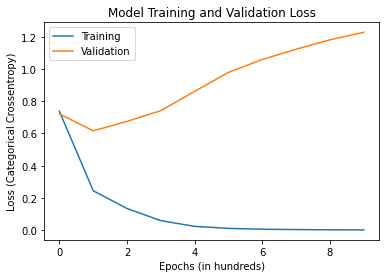

In [1633]:
plt.title("Model Training and Validation Loss")
plt.xlabel("Epochs (in hundreds)")
plt.ylabel("Loss (Categorical Crossentropy)")
plt.plot(history.history['loss'][::100])
plt.plot(history.history['val_loss'][::100])
plt.legend(labels=['Training', 'Validation']);

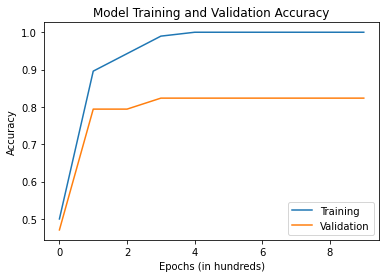

In [1632]:
plt.title("Model Training and Validation Accuracy")
plt.xlabel("Epochs (in hundreds)")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'][::100])
plt.plot(history.history['val_accuracy'][::100])
plt.legend(labels=['Training', 'Validation']);

I am using validation accuracy over validation loss for determining when to stop training. This is because the low point of my validation loss isn't my best accuracy and my overall goal is to improve accuracy. 

#### Evaluating Binary Model Further

I am calcuating the accuracy of the model across a 1000 randomly generated test/train sets to see how the model generalizes and to test the accuracy from earlier training.

In [87]:
def calculate_acc(X_test, y_test, model):
    correct = 0
    predictions = model.predict(X_test)
    for index in range(1, len(X_test)):
        if predictions[index][0] > predictions[index][1] and y_test[index][0] == 1:
            correct+=1
        elif predictions[index][1] > predictions[index][0] and y_test[index][1] == 1:
            correct+=1
    return correct/len(predictions)
    
    


In [1580]:
model_eval = keras.models.load_model(r"C:\Users\Pruthvi\Desktop\Beat Classifier\BinaryModelDrakeandNAV\ninetyfour.h5")

In [1581]:
trainaccuracy = []
testaccuracy = []
for h in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    trainaccuracy += [calculate_acc(X_train, y_train, model_eval)]
    testaccuracy += [calculate_acc(X_test, y_test, model_eval)]



0.9346666666666666


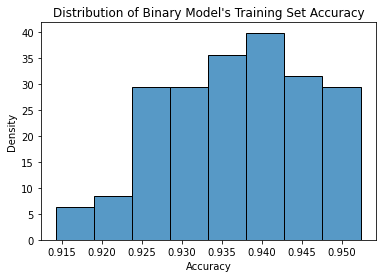

In [1582]:
print(np.mean(trainaccuracy))
sns.histplot(trainaccuracy, stat='density')
plt.xlabel("Accuracy")
plt.title("Distribution of Binary Model's Training Set Accuracy");



0.9285087719298245


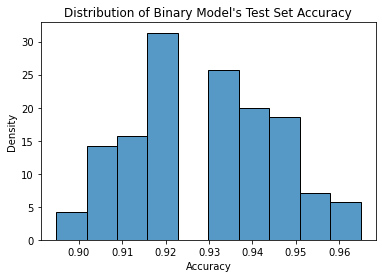

In [1583]:
print(np.mean(testaccuracy))
sns.histplot(testaccuracy, stat='density')
plt.title("Distribution of Binary Model's Test Set Accuracy")
plt.xlabel('Accuracy');

To save binary model:

In [1413]:
#model_binary.save(r'C:\Users\Pruthvi\Desktop\Beat Classifier\ninetyfour.h5')

In summary, this binary model, which classifies music as being closer to NAV or Drake's music, is able to do so with around ~93-94% accuracy when compared across 1000 samples. Now we will work with the entire subset of artists. Several key things I learned through this process of building a binary classifier:

1. Tradeoff between model complexity and generality for ensuring similar accuracy between training and testing sets.
2. Importance of standardizing the data after test-train-split. Allows model to reach "global" minimum and far quicker.
3. Increasing the batch-size allows the model to start off with higher accuracy and train faster overall (less epochs). I also got a higher accuracy across my test and training sets.
4. Keep track of accuracy across test and training sets and test several times since accuracy varies across samples.

In [1198]:
#model = load_model(r"C:\Users\Pruthvi\Desktop\Beat Classifier\ninetythree.h5")

### Full Multiclass Classifier

#### *Quick Changes

After testing different architecture/hyperparameters on the A.N.N. model, I realized that to achieve a high accuracy, there needs to be more data per artist. Hence, I will group related artists using help from the "Spotify Related Artists" feature and personal preference (considering recent collaborations between artists). This is increase the datapoints per group and decrease the overall number of groups.


In [7]:
sp.artist_related_artists('0c173mlxpT3dSFRgMO8XPh')['artists'][8]['name']

'Pusha T'

#### Grouping artists

In [6]:
def groupartists(names):
    for index in range(len(names)):
        if names[index] == "YG" or names[index] == "Tyga":
            names[index] ="YG x Tyga"
        
        elif names[index] == "Young Thug" or names[index] == "Future":
            names[index] = "Young Thug x Future"
        
        elif names[index] == "Meek Mill" or names[index] == "Lil Durk":
            names[index] = "Meek Mill x Lil Durk"
        
        elif names[index] == "Juicy J" or names[index] == "2 Chainz":
            names[index] = "Juicy J x 2 Chainz"
        
        elif names[index] == "Eminem" or names[index] == "Logic":
            names[index] = "Eminem x Logic"
        
        elif names[index] == "NAV" or names[index] == "Lil Uzi Vert":
            names[index] = "NAV x Lil Uzi Vert"
        
        elif names[index] == "Kid Cudi" or names[index] == "Jaden":
            names[index] = "Kid Cudi x Jaden"
        
        elif names[index] == "J. Cole" or names[index] == "21 Savage":
            names[index] = "J. Cole x 21 Savage"
        
        elif names[index] == "Lil Wayne" or names[index] == "DJ Khaled":
            names[index] = "Lil Wayne x DJ Khaled"
        
        elif names[index] == "The Weeknd" or names[index] == "Post Malone":
            names[index] = "The Weeknd x Post Malone"
        
        elif names[index] == "Kevin Gates" or names[index] == "Gucci Mane":
            names[index] = "Kevin Gates x Gucci Mane"
        
        elif names[index] == "Kanye West" or names[index] == "Big Sean":
            names[index] = "Kanye West x Big Sean"
            
        elif names[index] == "Tory Lanez" or names[index] == "DaBaby":
            names[index] = "Tory Lanez x Dababy"
            
        elif names[index] == "Russ" or names[index] == "Ty Dolla Sign":
            names[index] = "Russ x Ty Dolla Sign"
            
        elif names[index] == "Iamsu!" or names[index] == "G-Eazy":
            names[index] = "Iamsu! x G-Eazy"
        
    return names    
        
    

In [8]:
featuresdf = pd.read_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\songfeaturesartistfiltered.csv')

In [9]:
artistlabels = featuresdf['artist']

In [10]:
artistlabels.value_counts()

Nipsey Hussle     301
Gucci Mane        255
Lil Wayne         248
Juicy J           244
Iamsu!            235
Tyga              233
Russ              221
Young Thug        208
Meek Mill         203
21 Savage         190
J. Cole           190
Future            185
2 Chainz          183
Lil Durk          183
G-Eazy            181
Drake             181
Kanye West        180
Kevin Gates       177
French Montana    175
Kid Cudi          161
Big Sean          160
Tory Lanez        160
Wiz Khalifa       157
Ty Dolla Sign     154
Eminem            144
NAV               143
YG                142
Logic             139
The Weeknd        134
DJ Khaled         125
DaBaby            124
Lil Uzi Vert      122
Jaden             112
Post Malone       109
Name: artist, dtype: int64

In [11]:
artistlabels1 = groupartists(artistlabels)

<ipython-input-6-f20ecc94eaaf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names[index] = "NAV x Lil Uzi Vert"
<ipython-input-6-f20ecc94eaaf>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names[index] = "Tory Lanez x Dababy"
<ipython-input-6-f20ecc94eaaf>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names[index] = "J. Cole x 21 Savage"
<ipython-input-6-f20ecc94eaaf>:7: SettingWithCopyWarning: 
A value is trying to be set

In [12]:
artistlabels1.value_counts()

Kevin Gates x Gucci Mane    432
Juicy J x 2 Chainz          427
Iamsu! x G-Eazy             416
Young Thug x Future         393
Meek Mill x Lil Durk        386
J. Cole x 21 Savage         380
YG x Tyga                   375
Russ x Ty Dolla Sign        375
Lil Wayne x DJ Khaled       373
Kanye West x Big Sean       340
Nipsey Hussle               301
Tory Lanez x Dababy         284
Eminem x Logic              283
Kid Cudi x Jaden            273
NAV x Lil Uzi Vert          265
The Weeknd x Post Malone    243
Drake                       181
French Montana              175
Wiz Khalifa                 157
Name: artist, dtype: int64

In [13]:
featuresdf['artist'] = artistlabels1

In [14]:
featuresdf

,artist,danceability,energy,key,loudness,acousticness,liveness,valence,tempo,duration_ms,major,minor
0,NAV x Lil Uzi Vert,0.721,0.684,5,-10.378,0.93700,0.9010,0.913,126.958,34936,1,0
1,NAV x Lil Uzi Vert,0.835,0.509,1,-6.792,0.03420,0.1400,0.275,129.077,145121,1,0
2,NAV x Lil Uzi Vert,0.918,0.544,6,-3.749,0.01220,0.0850,0.311,122.017,151481,0,1
3,NAV x Lil Uzi Vert,0.955,0.619,5,-5.242,0.03170,0.1080,0.524,116.026,157242,0,1
4,NAV x Lil Uzi Vert,0.788,0.778,11,-4.931,0.00218,0.1440,0.543,159.995,159004,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6054,Juicy J x 2 Chainz,0.732,0.729,9,-2.955,0.14900,0.5080,0.690,128.968,253200,0,1
6055,Juicy J x 2 Chainz,0.823,0.612,11,-5.832,0.08420,0.1100,0.537,96.989,199160,1,0
6056,Juicy J x 2 Chainz,0.776,0.427,1,-11.808,0.02460,0.0882,0.891,132.192,230280,1,0
6057,Juicy J x 2 Chainz,0.727,0.632,9,-11.110,0.03410,0.0829,0.635,148.553,219227,0,1


In [15]:
featuresdf.to_csv(r'C:\Users\Pruthvi\Desktop\Beat Classifier\fullclassifierdataset.csv')

#### Preparing X and Y matrices

In [285]:
#X-matrix
X = featuresdf.iloc[:,1:].to_numpy()

In [286]:
X.shape

(6059, 11)

In [287]:
#Y-matrix

#One-hot-encoding
Y_cat = featuresdf['artist']
encoder = LabelEncoder()
encoder.fit(Y_cat)
Y_encoded = encoder.transform(Y_cat)
Y = to_categorical(Y_encoded)
Y.shape

(6059, 19)

In [293]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, Y, test_size=0.30)

In [294]:
#Standardize X
sc = StandardScaler()
X_train_full = sc.fit_transform(X_train_full)
X_test_full = sc.transform(X_test_full)

I will be using a GridSearch to find the ideal hyperparameters for my model.

#### GridSearch

In [383]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=11, activation=activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes, kernel_initializer='he_normal', activation=activation))
            model.add(Dropout(0.3))
    
    model.add(Dense(units = 19, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
    return model
    

In [384]:
model_full = KerasClassifier(build_fn=create_model, verbose=2)

In [385]:
layers = [(64,32,16), (1024, 512), (128, 64, 32, 16), (16, 16, 16, 16, 16), (64, 32, 16, 16, 8), 
          (128, 64, 32, 16, 8), (4096,)]

activations = ['relu']

batch_sizes = (256, 512, 1024, 2048, 4096)

epochs = [6000]

param_grid = {'layers': layers, 'activation': activations, 'batch_size': batch_sizes, 'epochs': epochs}

theGrid = GridSearchCV(estimator=model_full, param_grid=param_grid,cv=5)

 Running this code in the Jupyter Notebook isn't feasible. Local machines can't handle a large grid search like this. 

### Hence we move to Google Colab!

In [ ]:
###Don't run this cell!!!
#best_model = theGrid.fit(X_train_full, y_train_full)